学习sklearn集成学习算法。

# Boost

## AdaBoost分类

In [2]:
# 测试AdaBoost分类
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个基分类器，这里使用决策树
base_estimator = DecisionTreeClassifier(max_depth=1)

# 创建AdaBoost分类器
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost classifier: {accuracy:.2f}")

Accuracy of AdaBoost classifier: 0.82


## 调参

In [ ]:
# AdaBoost调参
from sklearn.model_selection import GridSearchCV
import numpy as np

# 定义参数网格
param_grid = {
    'n_estimators': np.arange(10, 101, 10),
    'learning_rate': np.linspace(0.1, 1.0, 10)
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Best parameters found:  {'learning_rate': 0.7000000000000001, 'n_estimators': 100}
# Best cross-validation score: 0.87

Best parameters found:  {'learning_rate': 0.7000000000000001, 'n_estimators': 100}
Best cross-validation score: 0.87


In [15]:
cv_result = grid_search.cv_results_
cv_result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

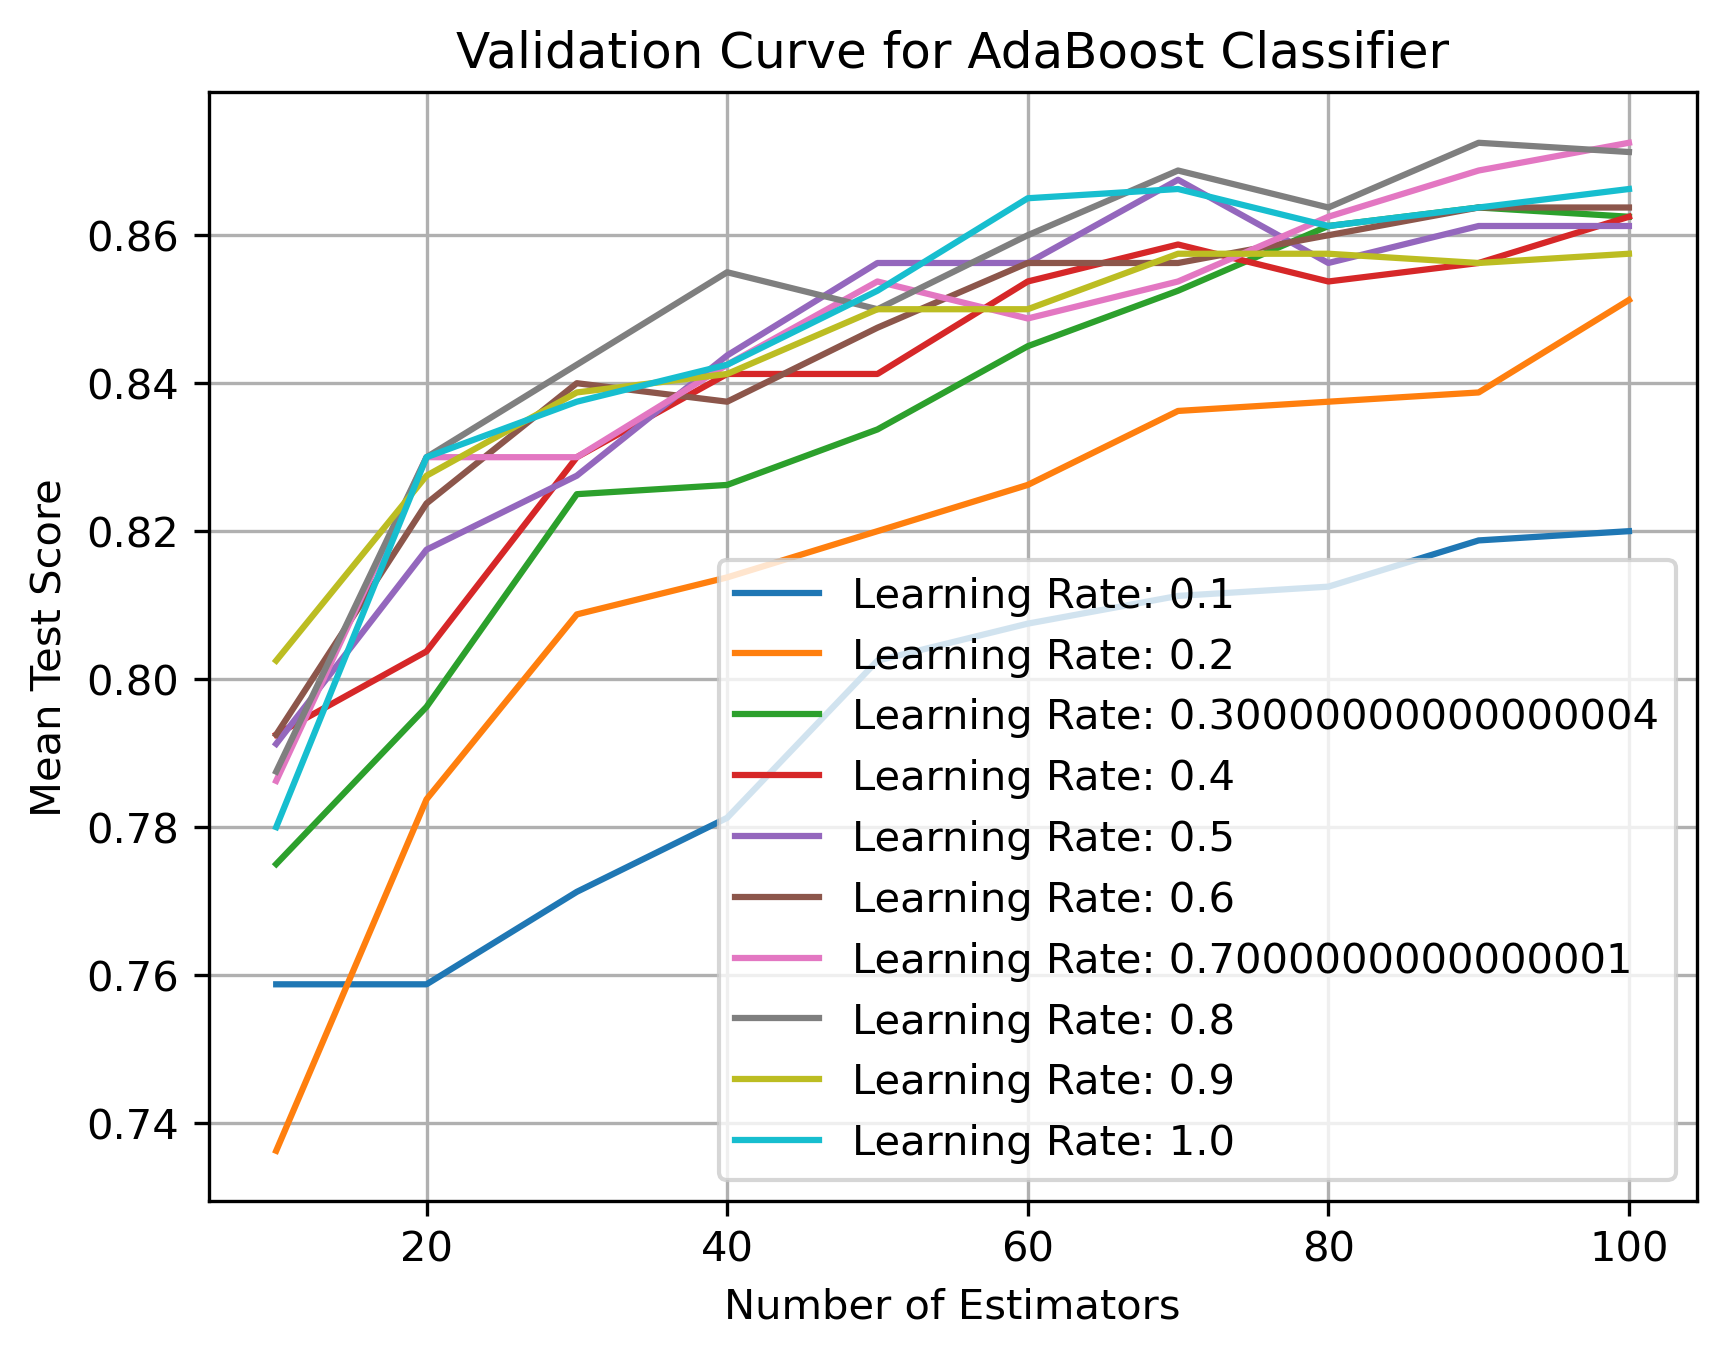

In [20]:
# 绘制验证曲线
import matplotlib.pyplot as plt

# 获取验证曲线数据
test_scores = grid_search.cv_results_['mean_test_score']
param_n_estimators = grid_search.cv_results_['param_n_estimators'].data
param_learning_rate = grid_search.cv_results_['param_learning_rate'].data

# 绘制验证曲线
plt.figure(dpi = 300)
for learning_rate in np.unique(param_learning_rate):
    mask = param_learning_rate == learning_rate
    plt.plot(param_n_estimators[mask], test_scores[mask], label=f'Learning Rate: {learning_rate}')
plt.title('Validation Curve for AdaBoost Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [23]:
np.arange(50, 151, 10)

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

In [30]:
# AdaBoost调参
from sklearn.model_selection import GridSearchCV
import numpy as np

# 定义参数网格
param_grid = {
    'n_estimators': np.arange(50, 501, 45),
    'learning_rate': np.linspace(0.3, 1.0, 8)
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Best parameters found:  {'learning_rate': 0.7000000000000001, 'n_estimators': 100}
# Best cross-validation score: 0.87

Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 500}
Best cross-validation score: 0.88


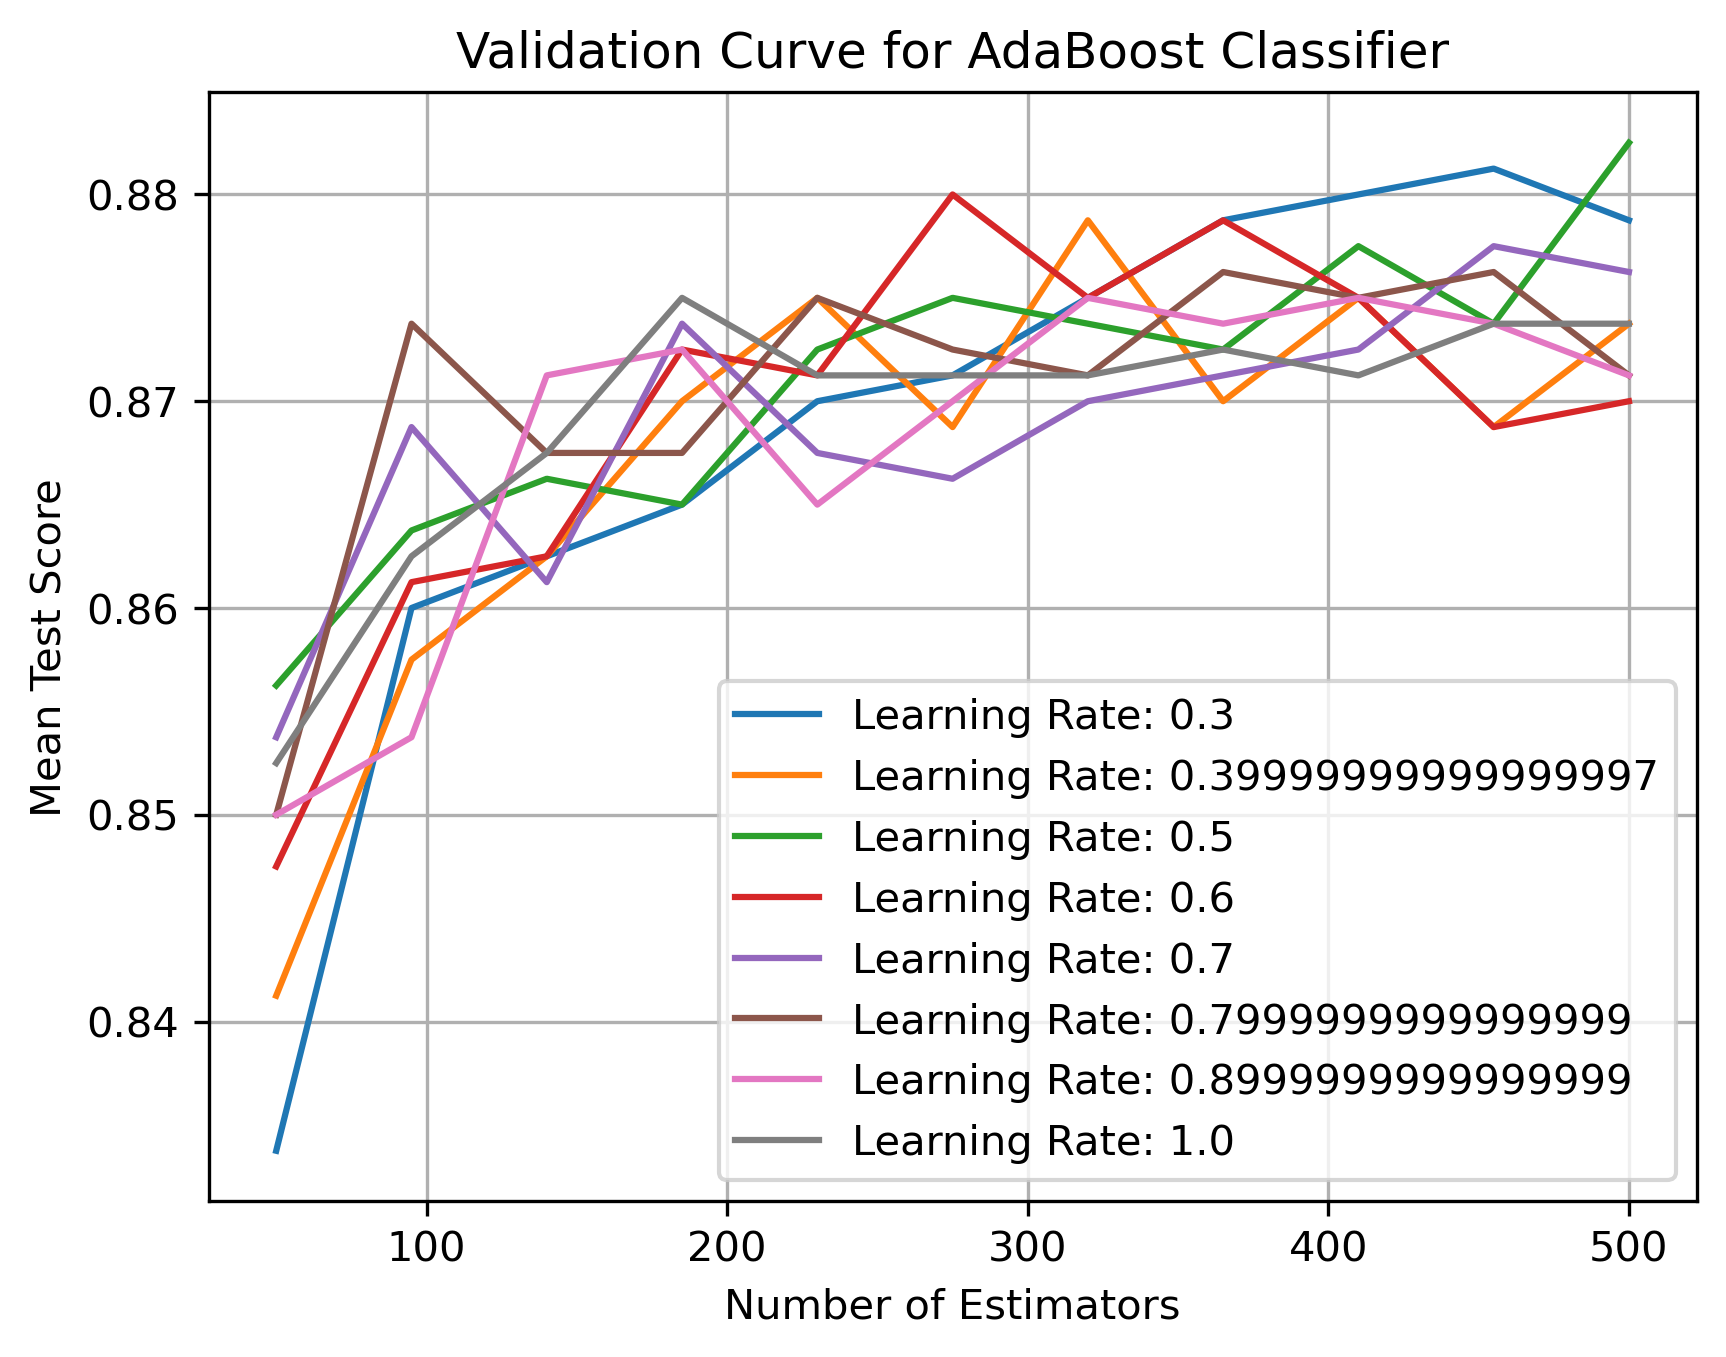

In [31]:
# 绘制验证曲线
import matplotlib.pyplot as plt

# 获取验证曲线数据
test_scores = grid_search.cv_results_['mean_test_score']
param_n_estimators = grid_search.cv_results_['param_n_estimators'].data
param_learning_rate = grid_search.cv_results_['param_learning_rate'].data

# 绘制验证曲线
plt.figure(dpi = 300)
for learning_rate in np.unique(param_learning_rate):
    mask = param_learning_rate == learning_rate
    plt.plot(param_n_estimators[mask], test_scores[mask], label=f'Learning Rate: {learning_rate}')
plt.title('Validation Curve for AdaBoost Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 提取score大于0.85的参数组合
param_n_estimators_best = param_n_estimators[grid_search.cv_results_['mean_test_score'] >= 0.88]
param_learning_rate_best = param_learning_rate[grid_search.cv_results_['mean_test_score'] >= 0.88]
test_scores_best = test_scores[grid_search.cv_results_['mean_test_score'] >= 0.88]

# 打印组合
for n_estimators, learning_rate, score in zip(param_n_estimators_best, param_learning_rate_best, test_scores_best):
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, score: {score:.2f}")

# n_estimators: 410, learning_rate: 0.3, score: 0.88
# n_estimators: 455, learning_rate: 0.3, score: 0.88
# n_estimators: 500, learning_rate: 0.5, score: 0.88
# n_estimators: 275, learning_rate: 0.6, score: 0.88

n_estimators: 410, learning_rate: 0.3, score: 0.88
n_estimators: 455, learning_rate: 0.3, score: 0.88
n_estimators: 500, learning_rate: 0.5, score: 0.88
n_estimators: 275, learning_rate: 0.6, score: 0.88


In [37]:
# 选择score为0.88的估计器最少的参数组合
clf_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=275,
    learning_rate=0.6,
    random_state=42
)

# 训练最终模型
clf_adaboost.fit(X_train, y_train)

# 进行预测
y_pred_final = clf_adaboost.predict(X_test)

# 计算最终模型的准确率
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final accuracy of AdaBoost classifier: {final_accuracy:.2f}")

Final accuracy of AdaBoost classifier: 0.83


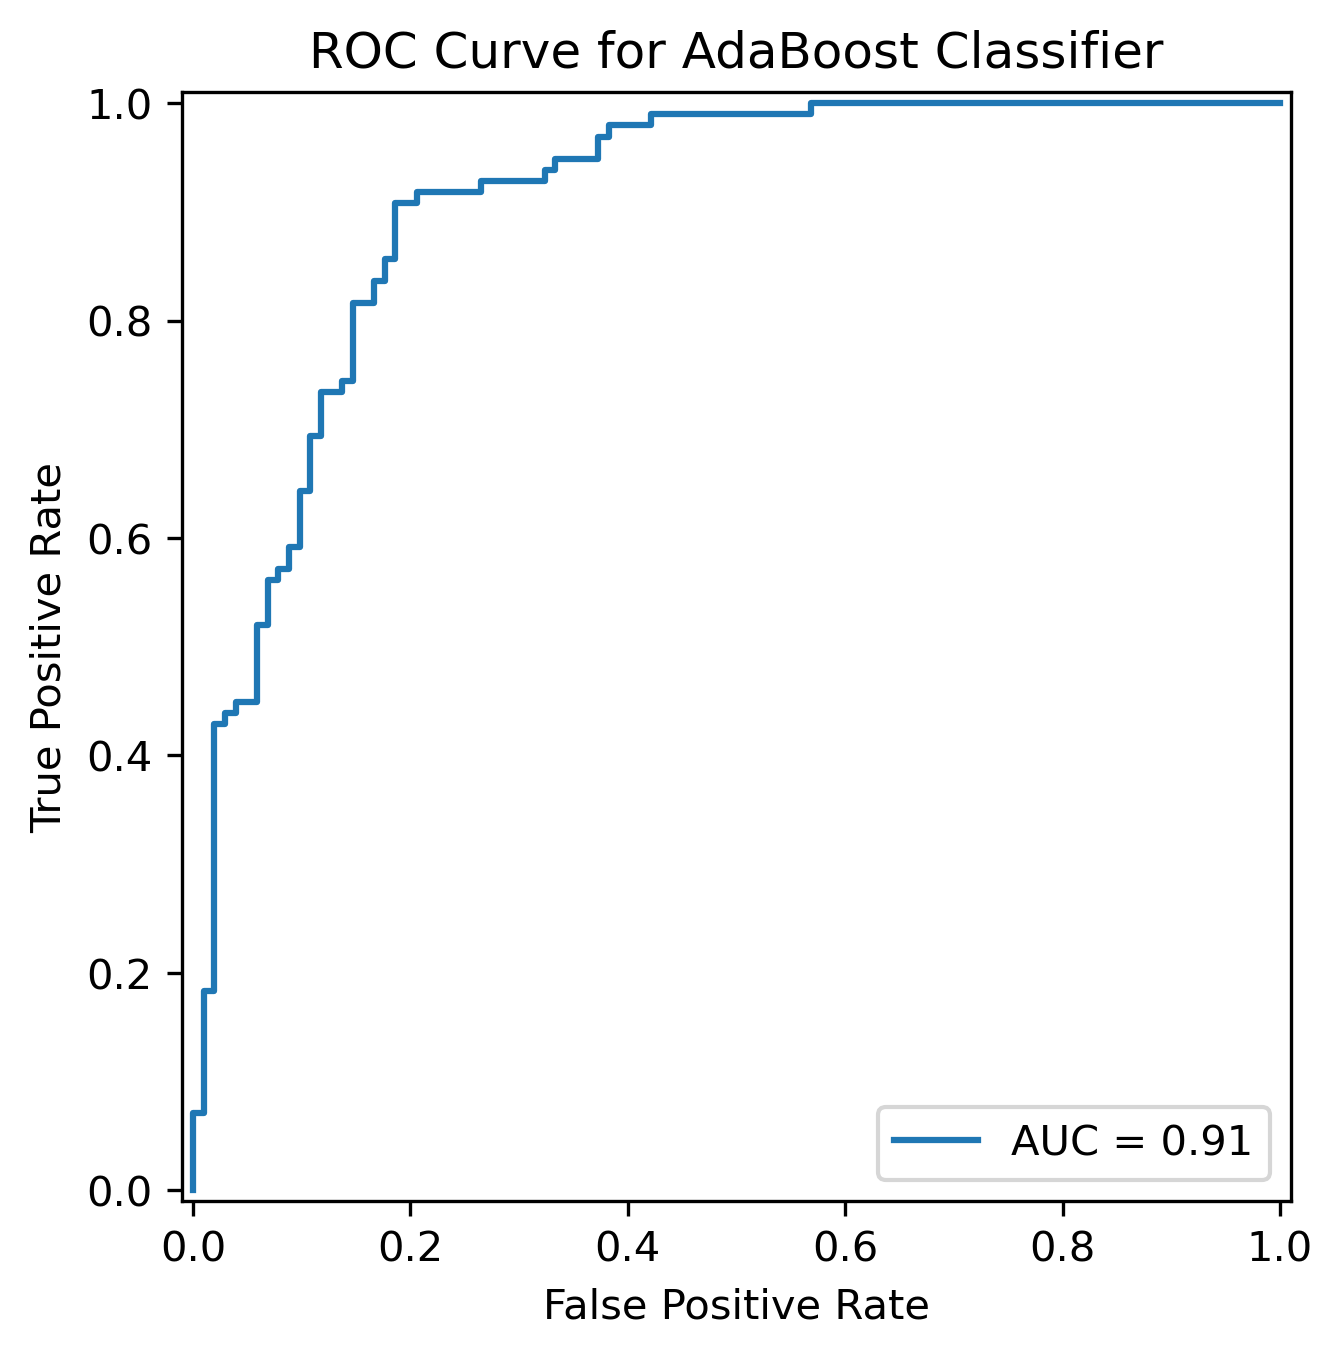

In [39]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, clf_adaboost.predict_proba(X_test)[:, 1])

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.rcParams["figure.dpi"] = 300
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve for AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Bagging

## 基础使用

In [42]:
# Bagging分类
from sklearn.ensemble import BaggingClassifier

# 创建Bagging分类器
bagging_model = BaggingClassifier(
    n_estimators=50,
    random_state=42
)

# 训练Bagging模型
bagging_model.fit(X_train, y_train)

# 进行预测
y_pred_bagging = bagging_model.predict(X_test)

# 计算Bagging模型的准确率
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of Bagging classifier: {bagging_accuracy:.2f}")

Accuracy of Bagging classifier: 0.89


## 调参

In [ ]:
# Bagging调参
# 定义学习器
bagging_model = BaggingClassifier(random_state=42)

# 定义参数范围
param_grid = {
    'n_estimators': np.arange(50, 1001, 50)
}

# 创建GridSearchCV对象
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search_bagging.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters found for Bagging: ", grid_search_bagging.best_params_)
print("Best cross-validation score for Bagging: {:.2f}".format(grid_search_bagging.best_score_))

# Best parameters found for Bagging:  {'n_estimators': 350}
# Best cross-validation score for Bagging: 0.91

Best parameters found for Bagging:  {'n_estimators': 350}
Best cross-validation score for Bagging: 0.91


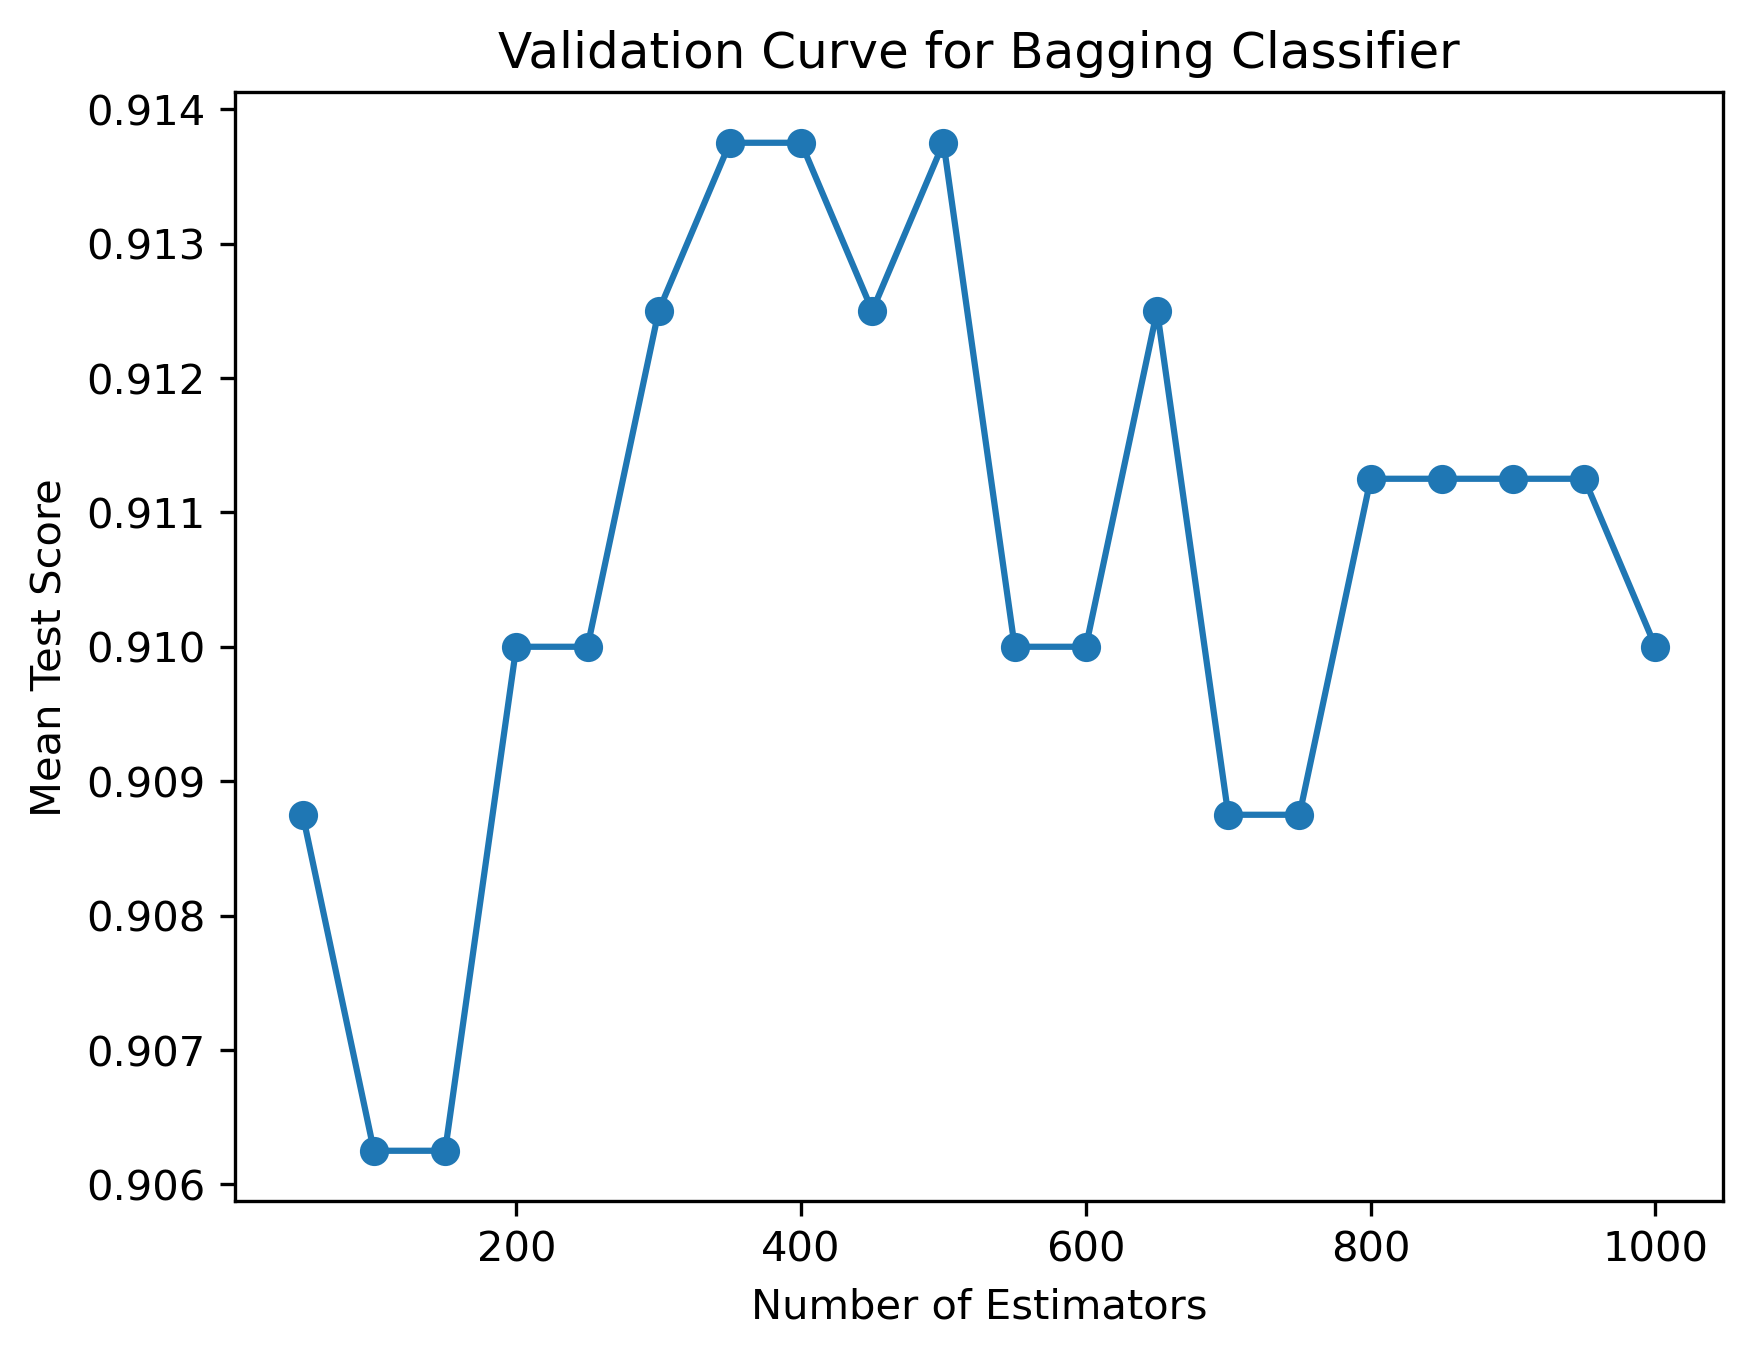

In [46]:
# 绘制验证曲线
test_scores_bagging = grid_search_bagging.cv_results_['mean_test_score']
param_n_estimators_bagging = grid_search_bagging.cv_results_['param_n_estimators'].data

# 绘制验证曲线
plt.figure(dpi=300)
plt.plot(param_n_estimators_bagging, test_scores_bagging, marker='o')
plt.title('Validation Curve for Bagging Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# Bagging调参
# 定义学习器
bagging_model = BaggingClassifier(random_state=42)

# 定义参数范围
param_grid = {
    'n_estimators': np.arange(200, 601, 10)
}

# 创建GridSearchCV对象
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search_bagging.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters found for Bagging: ", grid_search_bagging.best_params_)
print("Best cross-validation score for Bagging: {:.2f}".format(grid_search_bagging.best_score_))

# Best parameters found for Bagging:  {'n_estimators': 340}
# Best cross-validation score for Bagging: 0.91

Best parameters found for Bagging:  {'n_estimators': 340}
Best cross-validation score for Bagging: 0.91


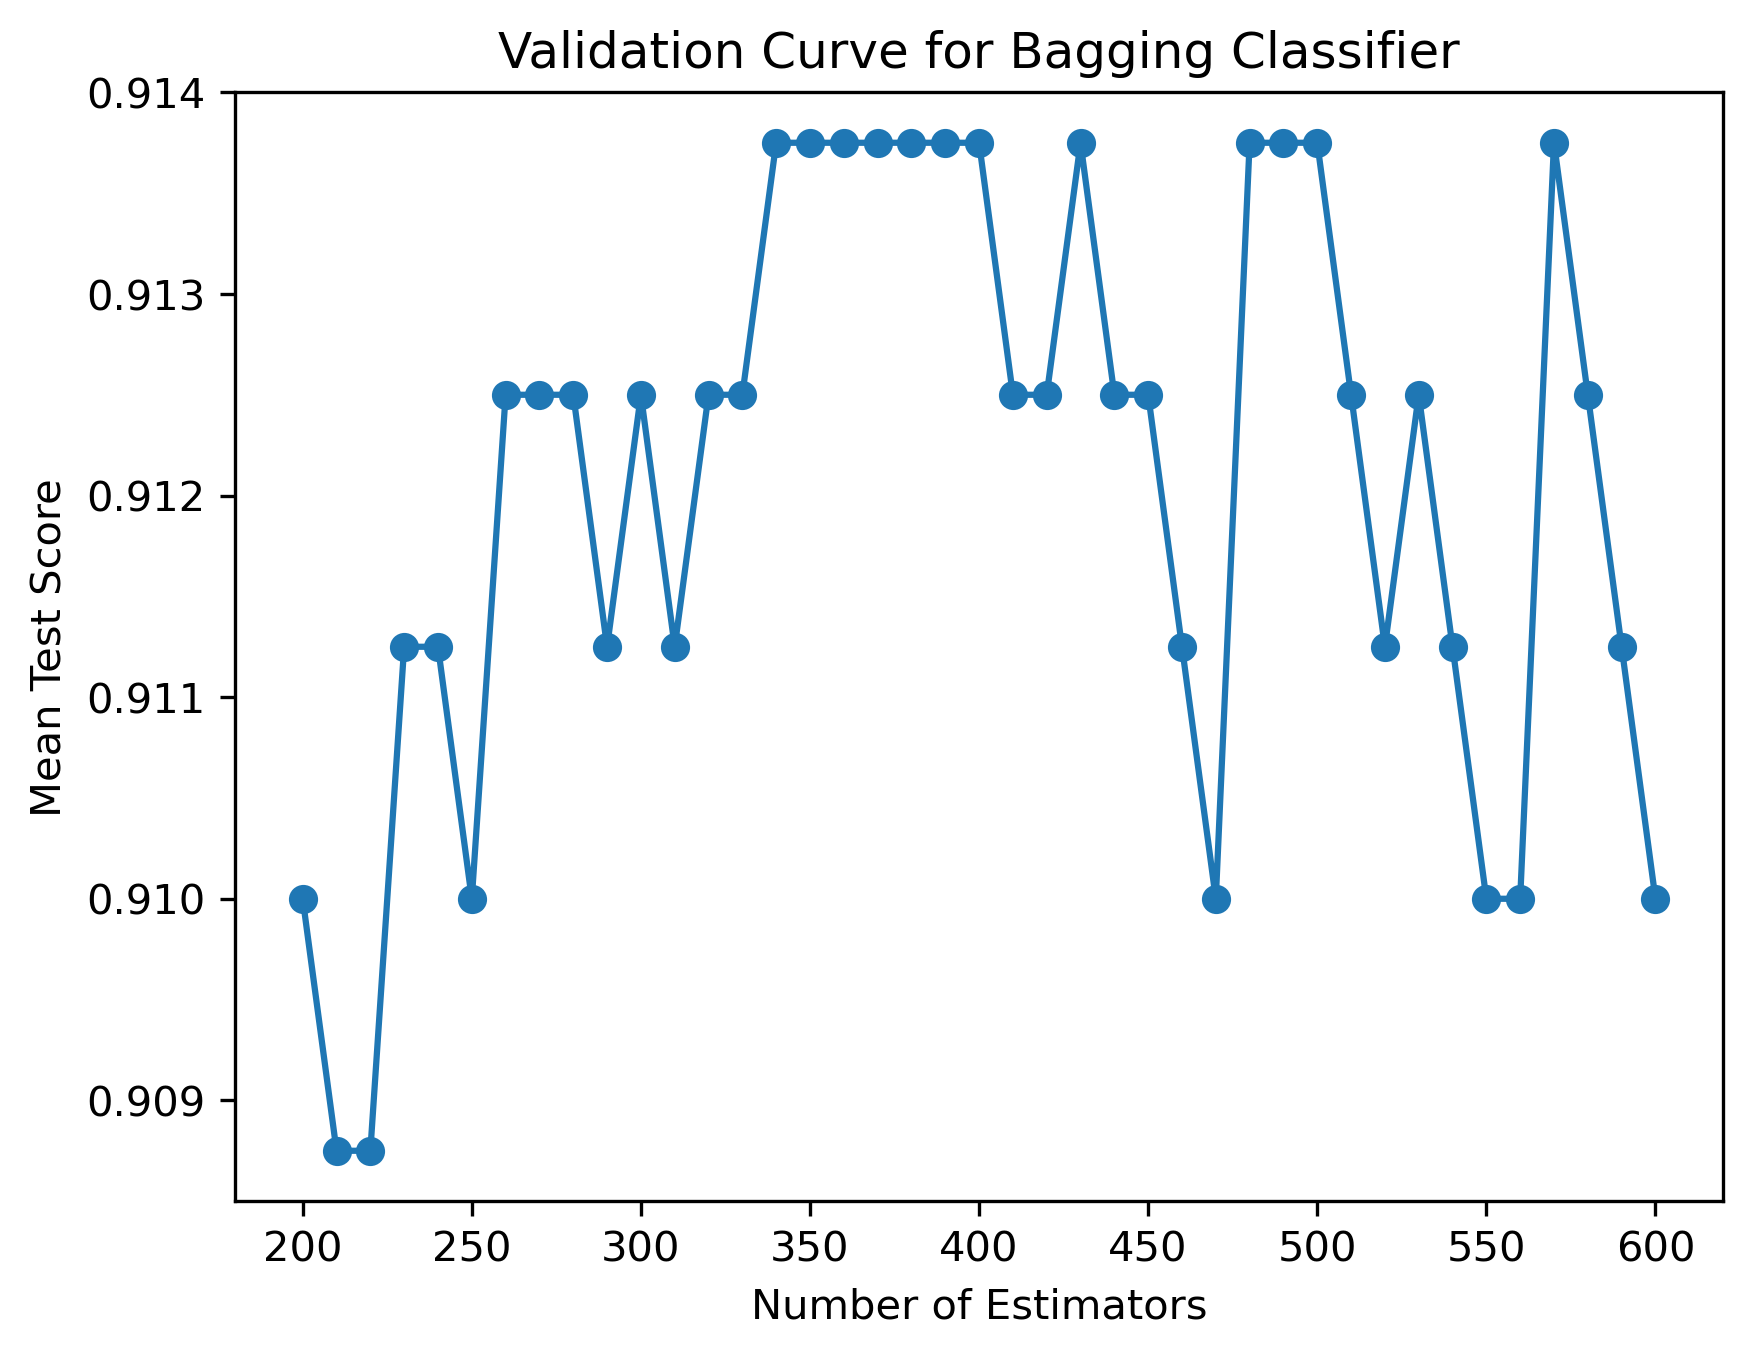

In [48]:
# 绘制验证曲线
test_scores_bagging = grid_search_bagging.cv_results_['mean_test_score']
param_n_estimators_bagging = grid_search_bagging.cv_results_['param_n_estimators'].data

# 绘制验证曲线
plt.figure(dpi=300)
plt.plot(param_n_estimators_bagging, test_scores_bagging, marker='o')
plt.title('Validation Curve for Bagging Classifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# Bagging调参
# 定义学习器
bagging_model = BaggingClassifier(random_state=42)

# 定义参数范围
param_grid = {
    'n_estimators': np.arange(300, 401, 10),
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9]
}

# 创建GridSearchCV对象
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 执行网格搜索
grid_search_bagging.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("Best parameters found for Bagging: ", grid_search_bagging.best_params_)
print("Best cross-validation score for Bagging: {:.2f}".format(grid_search_bagging.best_score_))

# Best parameters found for Bagging:  {'max_samples': 0.8, 'n_estimators': 350}
# Best cross-validation score for Bagging: 0.91

Best parameters found for Bagging:  {'max_samples': 0.8, 'n_estimators': 350}
Best cross-validation score for Bagging: 0.91


In [50]:
# 训练模型
bagging_best = BaggingClassifier(
    n_estimators=350,
    max_samples=0.8,
    random_state=42
)
bagging_best.fit(X_train, y_train)

# 进行预测
y_pred_bagging_best = bagging_best.predict(X_test)

# 计算Bagging模型的准确率
bagging_best_accuracy = accuracy_score(y_test, y_pred_bagging_best)
print(f"Final accuracy of Bagging classifier: {bagging_best_accuracy:.2f}")

Final accuracy of Bagging classifier: 0.91


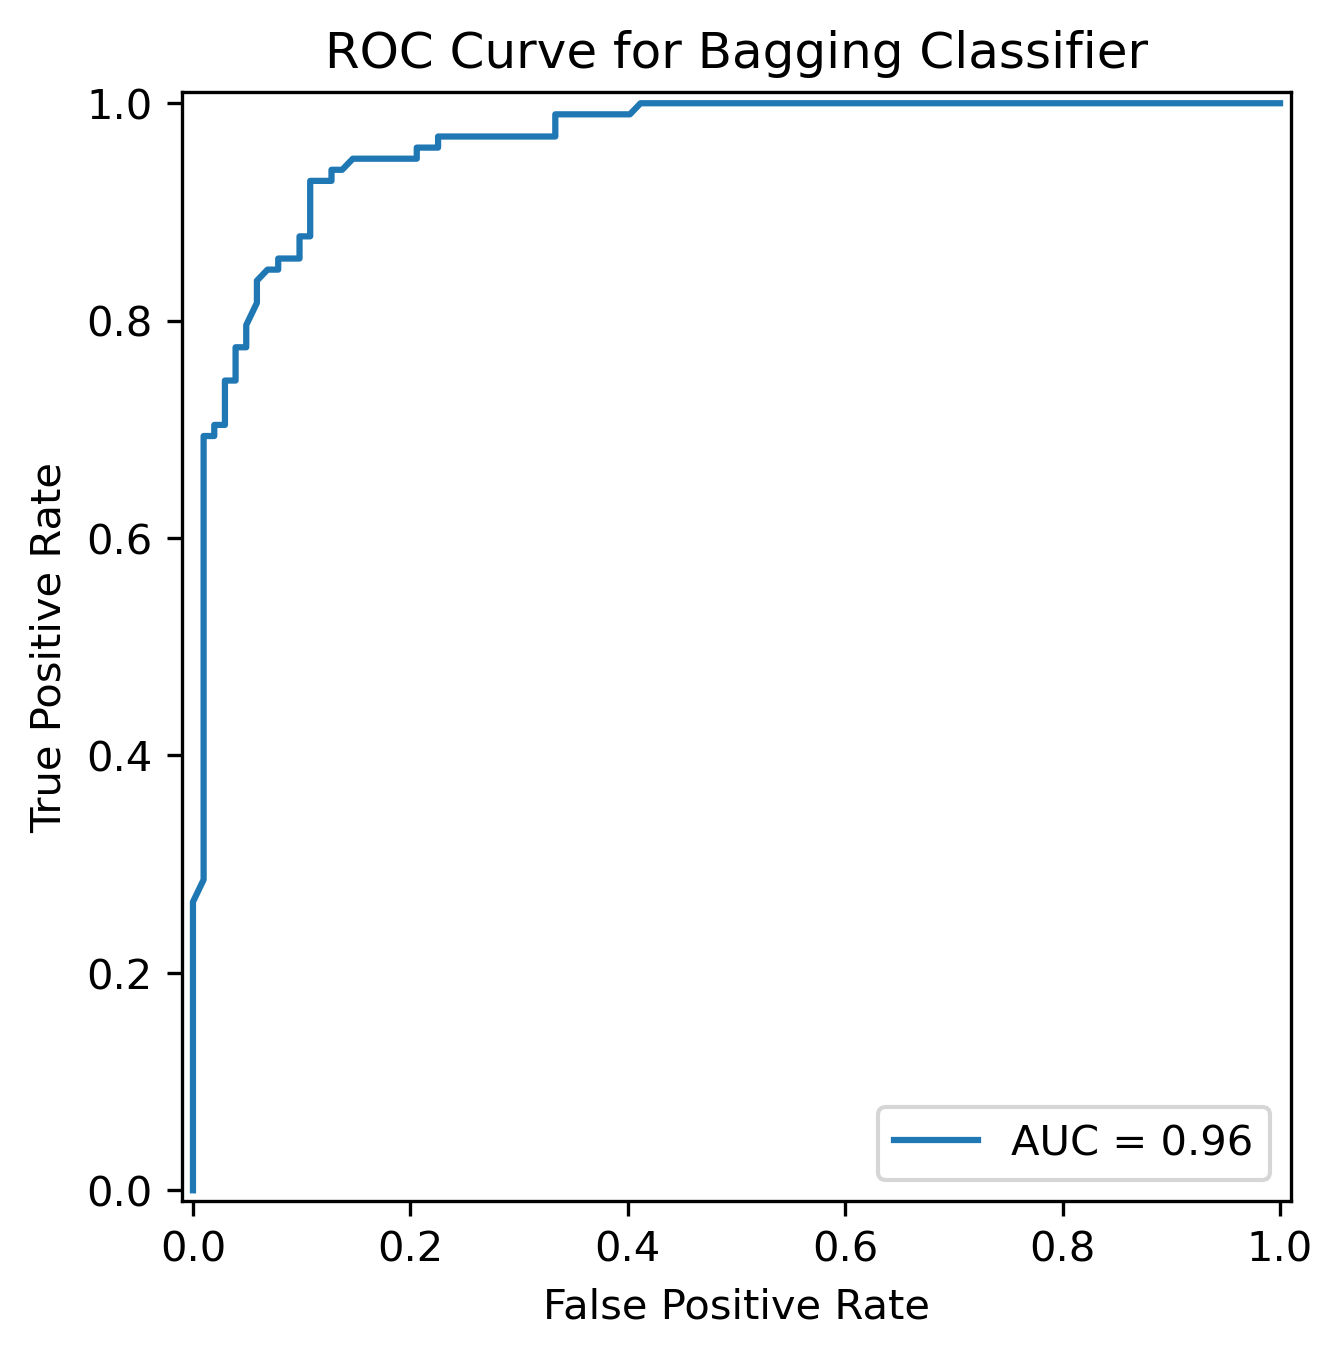

In [52]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# 计算ROC曲线
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, bagging_best.predict_proba(X_test)[:, 1])

# 计算AUC
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# 绘制ROC曲线
plt.rcParams["figure.dpi"] = 300
RocCurveDisplay(fpr=fpr_bagging, tpr=tpr_bagging, roc_auc=roc_auc_bagging).plot()
plt.title('ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Voting

## 基础使用

In [53]:
# 测试Voting
from sklearn.ensemble import VotingClassifier

# 创建基分类器
clf1 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=275,
    learning_rate=0.6,
    random_state=42
)

clf2 = BaggingClassifier(
    n_estimators=350,
    max_samples=0.8,
    random_state=42
)

clf3 = DecisionTreeClassifier(max_depth=5, random_state=42)

# 创建Voting分类器
voting_clf = VotingClassifier(
    estimators=[('adaboost', clf1), ('bagging', clf2), ('dt', clf3)],
    voting='soft',
    n_jobs=-1
)

# 训练Voting模型
voting_clf.fit(X_train, y_train)

# 进行预测
y_pred_voting = voting_clf.predict(X_test)

# 计算Voting模型的准确率
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Voting classifier: {voting_accuracy:.2f}")

Accuracy of Voting classifier: 0.84


# Stacking

## 基础使用

In [54]:
# 测试stacking
from sklearn.ensemble import StackingClassifier

# 创建基分类器
base_estimators = [
    ('adaboost', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=275,
        learning_rate=0.6,
        random_state=42
    )),
    ('bagging', BaggingClassifier(
        n_estimators=350,
        max_samples=0.8,
        random_state=42
    )),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
]

# 创建Stacking分类器
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    cv=5,
    n_jobs=-1
)

# 训练Stacking模型
stacking_clf.fit(X_train, y_train)

# 进行预测
y_pred_stacking = stacking_clf.predict(X_test)

# 计算Stacking模型的准确率
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking classifier: {stacking_accuracy:.2f}")

Accuracy of Stacking classifier: 0.89
